In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("OnlineRetail.csv",encoding='latin1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [4]:
df.shape

(499428, 8)

In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

___Exploratory Data Analysis___

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,499428.000000,499428.000000,379979.000000
mean,9.679517,4.481693,15271.312675
std,226.515728,92.194767,1710.629829
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13923.000000
50%,3.000000,2.080000,15116.000000
75%,10.000000,4.130000,16770.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499428 entries, 0 to 499427
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    499428 non-null  object 
 1   StockCode    499428 non-null  object 
 2   Description  498099 non-null  object 
 3   Quantity     499428 non-null  int64  
 4   InvoiceDate  499428 non-null  object 
 5   UnitPrice    499428 non-null  float64
 6   CustomerID   379979 non-null  float64
 7   Country      499428 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.5+ MB


In [8]:
df = df.drop(['Description'],axis=1)
df.isnull().sum().sort_values(ascending=False)

CustomerID     119449
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [9]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [10]:
df = df.rename(columns={'StockCode':'SKU'})

In [11]:
df.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [12]:
df.dtypes

InvoiceNo       object
SKU             object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [13]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate']) 

In [14]:
df.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [15]:
df['date']= df['InvoiceDate'].apply(lambda x : str(x).split(" "))

In [16]:
df.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"


In [17]:
df[['date','hour']]= pd.DataFrame(df['date'].tolist(), index=df.index)

In [18]:
df.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01-04,10:00:00


In [19]:
df.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
date                   object
hour                   object
dtype: object

In [20]:
df['date']= pd.to_datetime(df['date'])

In [21]:
df.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
date           datetime64[ns]
hour                   object
dtype: object

In [22]:
pd.DataFrame(df.isnull().sum(), columns =['null values'])

,null values
InvoiceNo,0
SKU,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,119449
Country,0
date,0
hour,0


In [23]:
df = df.dropna(subset=['CustomerID'])

In [24]:
df.shape

(379979, 9)

In [25]:
from datetime import datetime

In [26]:
df['Year']= pd.DatetimeIndex(df['InvoiceDate']).year

In [27]:
df['Month']= pd.DatetimeIndex(df['InvoiceDate']).month

In [28]:
# Find Count and distinct count of Each Column

print("No of Orders :",len(df['InvoiceNo'].unique()))
print("Quantity of orders :",len(df['Quantity'].unique()))
print("No of Products :",len(df['SKU'].unique()))
print("No of Customers :",len(df['CustomerID'].unique()))
print("No of Countries :",len(df['Country'].unique()))
print("Total Count of Years :",len(df['Year'].unique()))
print("No of Months :",len(df['Month'].unique()))

No of Orders : 20482
Quantity of orders : 425
No of Products : 3612
No of Customers : 4244
No of Countries : 36
Total Count of Years : 1
No of Months : 12


In [29]:
df.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,Year,Month
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1


In [30]:
len(df['Month'].unique())

12

In [31]:
len(df['InvoiceNo'].unique())

20482

In [32]:
len(df['SKU'].unique())

3612

In [33]:
#  Calculate Revenue per month and show in a data frame

df['revenue']= df['UnitPrice']*df['Quantity']

In [34]:
df.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,Year,Month,revenue
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,19.5
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,10.5
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,10.5
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,10.5
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,12.5


In [35]:
df_revenue =df.groupby('Month')['revenue'].sum().reset_index()

In [36]:
df_revenue

,Month,revenue
0,1,475074.380
1,2,436546.150
2,3,579964.610
3,4,426047.851
4,5,648251.080
5,6,608013.160
6,7,574238.481
7,8,616368.000
8,9,931440.372
9,10,974603.590


(-1.0, 12.0)

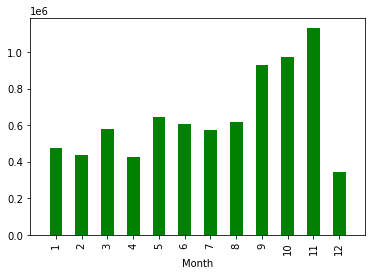

In [37]:
df.groupby(['Month'])['revenue'].sum().plot.bar(color="g")
plt.xlim(-1,12)

In [38]:
# Inference -
# We can see that the revenue in the month of November is highest out of all the months in the year because
# of the Pre- Christmas sales.

Text(0.5, 1.0, 'Revenue per month')

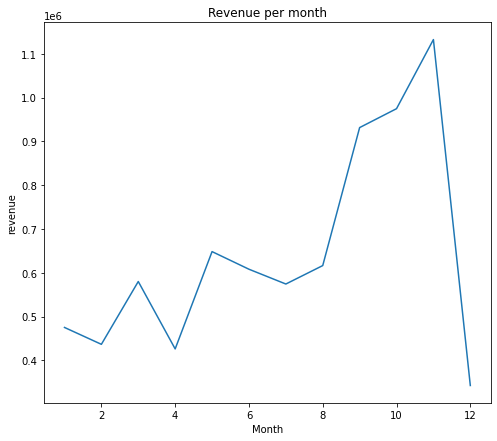

In [39]:
fig, axes=plt.subplots(figsize=(8,7))
ax = sns.lineplot(x='Month', y='revenue', data=df_revenue,sort=False)
ax.set_title("Revenue per month")

In [40]:
#  Calculate cumulative revenue for across all months

df_revenue['MonthlyGrowth']= df_revenue['revenue'].pct_change()

In [41]:
df_revenue

,Month,revenue,MonthlyGrowth
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


In [42]:
df_revenue = df_revenue.loc[df_revenue['Month']!=12]

In [43]:
df_revenue

,Month,revenue,MonthlyGrowth
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


In [44]:
df_revenue['MonthlyGrowth']= df_revenue['MonthlyGrowth'].fillna(0)

In [45]:
df_revenue

,Month,revenue,MonthlyGrowth
0,1,475074.380,0.000000
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


Text(0.5, 1.0, 'Monthly Growth Rate')

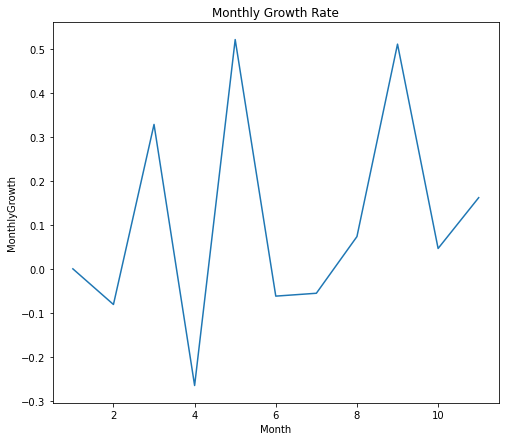

In [46]:
fig, axes=plt.subplots(figsize=(8,7))
ax = sns.lineplot(x='Month', y='MonthlyGrowth', data=df_revenue,sort=False)
ax.set_title("Monthly Growth Rate")

In [47]:
# Inference - 
# According to our dataset there is no data for the month of december, So that there are no 
# Active Sales and coming to month of April , Due to the peak pandemic sales has been dropped down.

In [48]:
# Revenue by Country

In [49]:
revenue_per_country = df.groupby(['Country'])['revenue'].sum().sort_values(ascending=False)
revenue_per_country = revenue_per_country.to_frame()
revenue_per_country.head()

,revenue
Country,
United Kingdom,6.284074e+06
Netherlands,2.758771e+05
EIRE,2.424596e+05
Germany,2.071354e+05
France,1.871375e+05


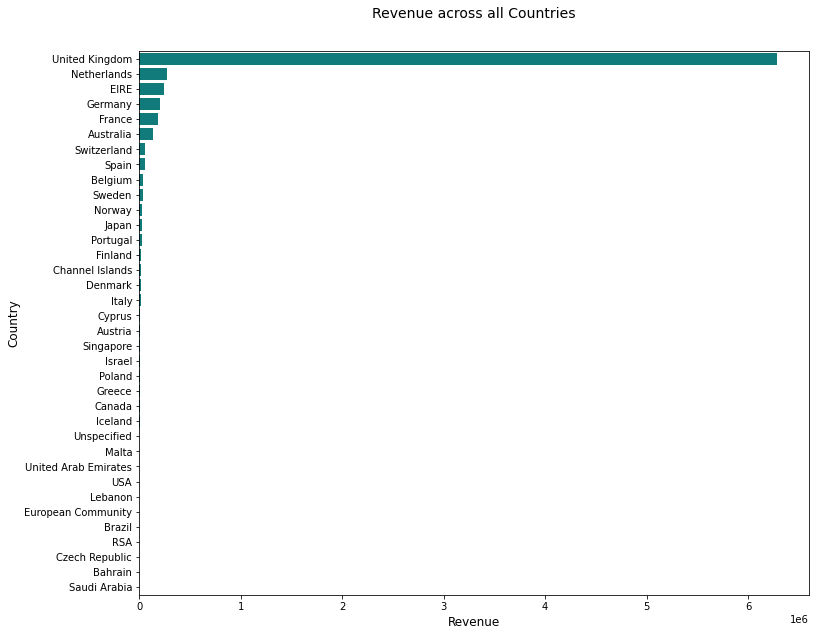

In [50]:
d = sns.barplot(x = 'revenue', y = revenue_per_country.index , data =revenue_per_country, color = 'darkcyan')
d.figure.set_size_inches(12,10)
d.set_xlabel('Revenue', size = 12)
d.set_ylabel('Country', size = 12)
d.set_title('Revenue across all Countries', size = 14, y = 1.05)
plt.show()

In [51]:
# Total active customers

df_monthly_active = df.groupby('Month')['CustomerID'].nunique().reset_index()

In [52]:
df_monthly_active

,Month,CustomerID
0,1,783
1,2,798
2,3,1020
3,4,899
4,5,1079
5,6,1051
6,7,993
7,8,980
8,9,1302
9,10,1425


Text(0.5, 1.0, 'Total Active Customers')

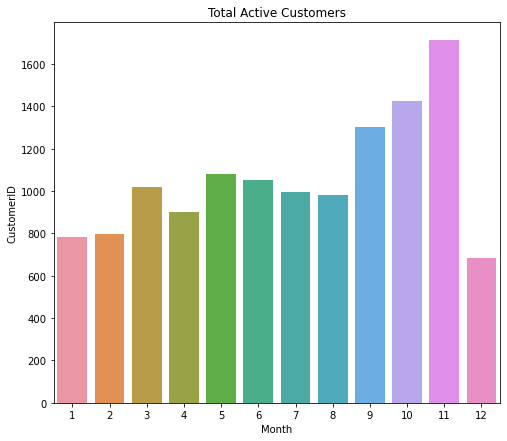

In [53]:
fig, axes=plt.subplots(figsize=(8,7))

ax =sns.barplot(x='Month', y='CustomerID', data=df_monthly_active)
ax.set_title("Total Active Customers")

In [54]:
# total unique order by month

df_unique_order = df.groupby('Month')['InvoiceNo'].nunique().reset_index()

In [55]:
df_unique_order

,Month,InvoiceNo
0,1,1236
1,2,1202
2,3,1619
3,4,1384
4,5,1849
5,6,1707
6,7,1593
7,8,1544
8,9,2078
9,10,2263


Text(0.5, 1.0, 'Total Unique order by month')

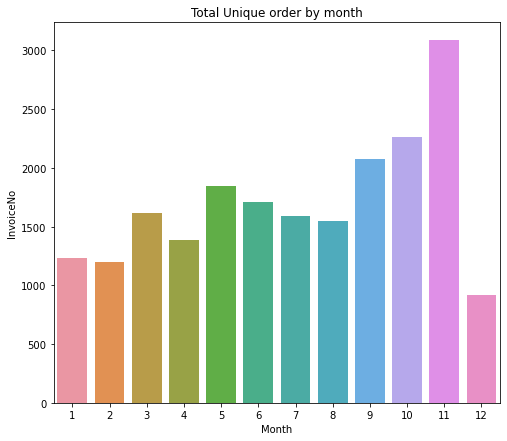

In [56]:
fig, axes=plt.subplots(figsize=(8,7))

ax =sns.barplot(x='Month', y='InvoiceNo', data=df_unique_order)
ax.set_title("Total Unique order by month")

In [57]:
df_order_sales = df.groupby('Month')['Quantity'].sum().reset_index()

In [58]:
 df_order_sales

,Month,Quantity
0,1,269379
1,2,262833
2,3,344012
3,4,278585
4,5,367852
5,6,356922
6,7,363418
7,8,386612
8,9,537496
9,10,569666


Text(0.5, 1.0, 'Order Sales')

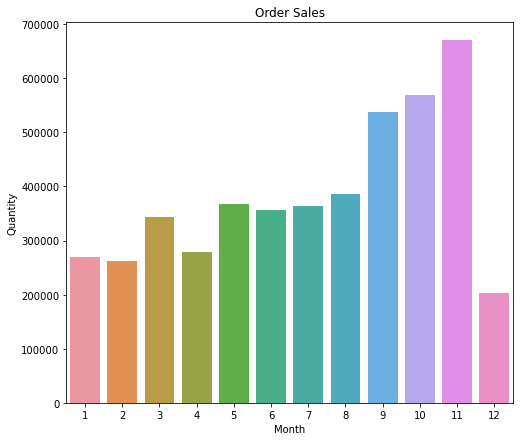

In [59]:
fig, axes=plt.subplots(figsize=(8,7))

ax =sns.barplot(x='Month', y='Quantity', data=df_order_sales)
ax.set_title("Order Sales")

In [60]:
# Total SKU (distinct count of Stock code) by country and month

df_distinct_StockCode = df.groupby('Month')['SKU'].nunique().reset_index()

In [61]:
df_distinct_StockCode

,Month,SKU
0,1,2154
1,2,2144
2,3,2244
3,4,2228
4,5,2232
5,6,2345
6,7,2370
7,8,2369
8,9,2552
9,10,2663


Text(0.5, 1.0, 'Unique StockCode per Month')

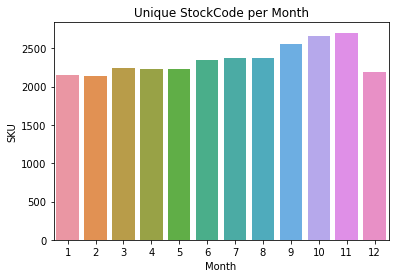

In [62]:
df1 = sns.barplot(x='Month', y='SKU', data=df_distinct_StockCode)
df1.set_title("Unique StockCode per Month")

In [63]:
# StockCode Per Country

stockcode= df.groupby(['Country'])['SKU'].nunique().sort_values()
stockcode = stockcode.to_frame()
stockcode

,SKU
Country,
Saudi Arabia,9
Bahrain,16
Czech Republic,25
Brazil,32
Lebanon,45
European Community,50
RSA,58
United Arab Emirates,68
Iceland,87


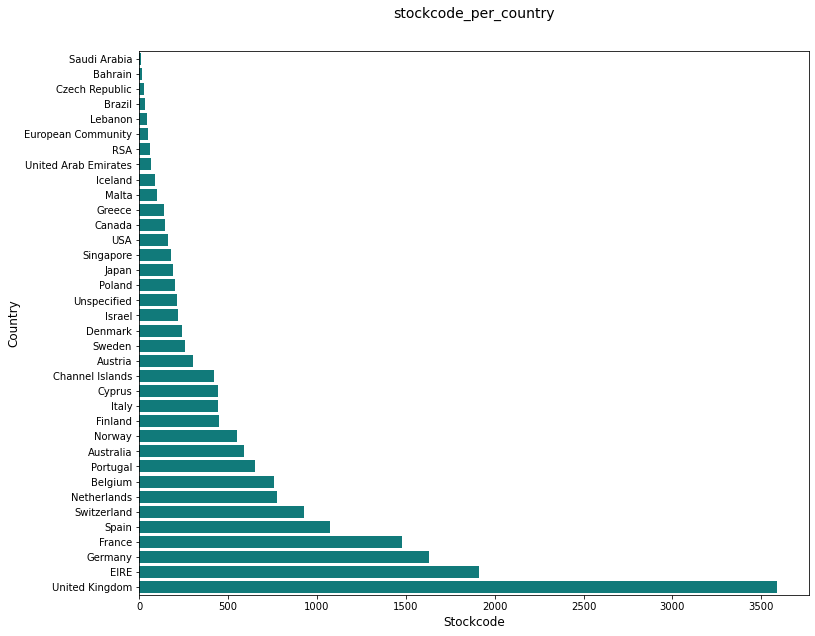

In [64]:
d = sns.barplot(x='SKU', y = stockcode.index , data = stockcode, color = 'darkcyan')
d.figure.set_size_inches(12, 10)
d.set_xlabel('Stockcode', size = 12)
d.set_ylabel('Country', size = 12)
d.set_title('stockcode_per_country', size = 14, y = 1.05)
plt.show()

In [65]:
# Monthly revenue (avg) per order

df_avg_revenue = df.groupby('Month')['revenue'].mean().reset_index()

In [66]:
df_avg_revenue

,Month,revenue
0,1,21.681014
1,2,21.438204
2,3,20.845540
3,4,18.365715
4,5,22.424626
5,6,21.842691
6,7,20.879881
7,8,22.282120
8,9,22.817118
9,10,19.224846


Text(0.5, 1.0, 'Average revenue per month')

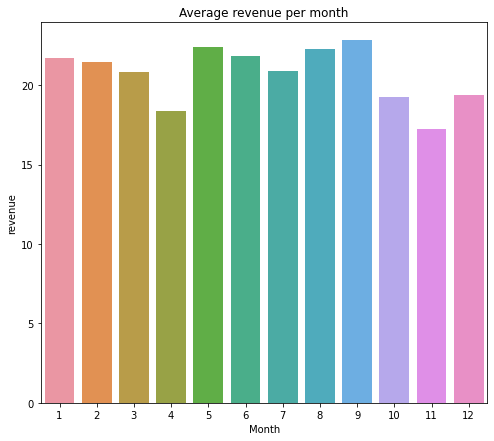

In [67]:
fig, axes=plt.subplots(figsize=(8,7))

ax =sns.barplot(x='Month', y='revenue', data=df_avg_revenue)
ax.set_title("Average revenue per month")

___Find whether a customer is the new customer or not. A new customer would be figured 
out based on their first date of purchase___

In [68]:
df_min_date = df.groupby('CustomerID').date.min().reset_index()

In [69]:
df_min_date

,CustomerID,date
0,12346.0,2011-01-18
1,12347.0,2011-01-26
2,12348.0,2011-01-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4239,18280.0,2011-03-07
4240,18281.0,2011-06-12
4241,18282.0,2011-08-05
4242,18283.0,2011-01-06


In [70]:
df_min_date.columns=['CustomerID', 'MinPurchaseDate']

In [71]:
df_min_date['MinPurchaseMonth']= df_min_date['MinPurchaseDate'].map(lambda date: date.month)

In [72]:
df_min_date

,CustomerID,MinPurchaseDate,MinPurchaseMonth
0,12346.0,2011-01-18,1
1,12347.0,2011-01-26,1
2,12348.0,2011-01-25,1
3,12349.0,2011-11-21,11
4,12350.0,2011-02-02,2
...,...,...,...
4239,18280.0,2011-03-07,3
4240,18281.0,2011-06-12,6
4241,18282.0,2011-08-05,8
4242,18283.0,2011-01-06,1


In [73]:
df = pd.merge(df, df_min_date, on='CustomerID')

In [74]:
df.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,Year,Month,revenue,MinPurchaseDate,MinPurchaseMonth
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,19.5,2011-01-04,1
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,10.5,2011-01-04,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,10.5,2011-01-04,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,10.5,2011-01-04,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,12.5,2011-01-04,1


In [75]:
df['UserType'] = 'New'
df.loc[df['Month'] > df['MinPurchaseMonth'], 'UserType']= 'Existing'

In [76]:
df

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,Year,Month,revenue,MinPurchaseDate,MinPurchaseMonth,UserType
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,19.50,2011-01-04,1,New
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,10.50,2011-01-04,1,New
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,10.50,2011-01-04,1,New
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,10.50,2011-01-04,1,New
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01-04,10:00:00,2011,1,12.50,2011-01-04,1,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379974,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09,12:16:00,2011,12,15.00,2011-12-09,12,New
379975,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,2011,12,10.20,2011-12-09,12,New
379976,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,2011,12,10.20,2011-12-09,12,New
379977,581578,23215,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09,12:16:00,2011,12,24.96,2011-12-09,12,New


In [77]:
df.sample(5)

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,Year,Month,revenue,MinPurchaseDate,MinPurchaseMonth,UserType
233387,566599,23201,1,2011-09-13 15:37:00,2.08,15998.0,United Kingdom,2011-09-13,15:37:00,2011,9,2.08,2011-03-22,3,Existing
221545,573123,23366,16,2011-10-27 16:23:00,0.65,13654.0,United Kingdom,2011-10-27,16:23:00,2011,10,10.40,2011-03-11,3,Existing
187022,568527,23207,10,2011-09-27 13:21:00,1.65,13178.0,United Kingdom,2011-09-27,13:21:00,2011,9,16.50,2011-02-17,2,Existing
68392,540525,22411,10,2011-01-09 13:02:00,1.95,16833.0,United Kingdom,2011-01-09,13:02:00,2011,1,19.50,2011-01-09,1,New
83889,571034,23424,4,2011-10-13 12:47:00,4.95,12359.0,Cyprus,2011-10-13,12:47:00,2011,10,19.80,2011-01-12,1,Existing


___Find total revenue per month for new and existing customer per month. Show it in a 
visual___

In [78]:
df_UserTypeRevenue = df.groupby(['Month', 'UserType'])['revenue'].sum().reset_index()

In [79]:
df_UserTypeRevenue

,Month,UserType,revenue
0,1,New,475074.380
1,2,Existing,222645.040
2,2,New,213901.110
3,3,Existing,356562.750
4,3,New,223401.860
5,4,Existing,283526.090
6,4,New,142521.761
7,5,Existing,518892.810
8,5,New,129358.270
9,6,Existing,508100.200


Text(0.5, 1.0, 'Revenue per User Type')

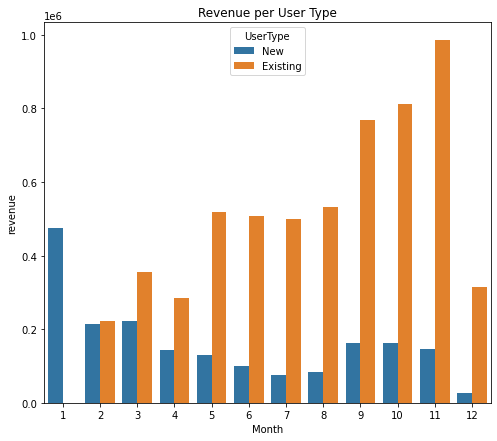

In [80]:
fig, axes=plt.subplots(figsize=(8,7))

ax =sns.barplot(x='Month', y='revenue', data=df_UserTypeRevenue, hue='UserType')
ax.set_title("Revenue per User Type")

___Calculate total revenue per month by day for new and existing customer – in same graph. (You can use line graph)___

Text(0.5, 1.0, 'Revenue per User Type')

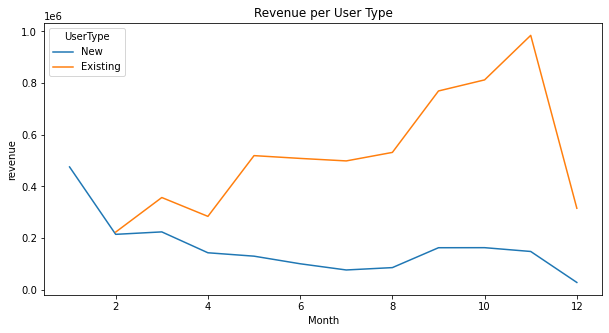

In [81]:
fig, axes=plt.subplots(figsize=(10,5))

ax =sns.lineplot(x='Month', y='revenue', data=df_UserTypeRevenue, hue='UserType')
ax.set_title("Revenue per User Type")

___Calculate monthly retention rate (using crosstab() function of pandas) and find out total 
retained user on a monthly basis.___ 

In [82]:
df_user_purchase = df.groupby(['CustomerID','Month'])['revenue'].sum().reset_index()

In [83]:
df_user_purchase

,CustomerID,Month,revenue
0,12346.0,1,0.00
1,12347.0,1,475.39
2,12347.0,4,636.25
3,12347.0,6,382.52
4,12347.0,8,584.91
...,...,...,...
12722,18283.0,10,114.65
12723,18283.0,11,651.56
12724,18283.0,12,208.00
12725,18287.0,5,765.28


In [84]:
df_user_retention = pd.crosstab(df_user_purchase['CustomerID'],df_user_purchase['Month']).reset_index()

In [85]:
df_user_retention

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11,12
0,12346.0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,18280.0,0,0,1,0,0,0,0,0,0,0,0,0
4240,18281.0,0,0,0,0,0,1,0,0,0,0,0,0
4241,18282.0,0,0,0,0,0,0,0,1,0,0,0,1
4242,18283.0,1,1,0,1,1,1,1,0,1,1,1,1


___Retention Rate___

___In marketing and product management, retention rate refers to the percentage of customers who continue paying for a product over a given timeframe.___

In [86]:
# Inference-

# So In businesses retention rate is important to lead Outsized profits